# Computational Theory Assignment

## a)

In [4]:
import numpy as np
from matplotlib import pyplot as plt

f, ax = plt.subplots(1,3) 
f.set_figheight(5)
f.set_figwidth(20)

x = np.linspace(-1, 1, 100)
ax[0].plot(x, np.exp(-x), label='exp(-x)')
ax[0].plot(x,1-x, color = 'red', label = '1-x')
ax[0].legend(loc='best')
ax[0].grid()

x = np.linspace(-5, 5, 100)
ax[1].plot(x, np.exp(-x), label='exp(-x)')
ax[1].plot(x,1-x, color = 'red', label = '1-x')
ax[1].legend(loc='best')
ax[1].grid()

x = np.linspace(-2, 100, 1000)
ax[2].plot(x, np.exp(-x), label='exp(-x)')
ax[2].plot(x,1-x, color = 'red', label = '1-x')
ax[2].legend(loc='best')
ax[2].grid()

## b)

In [2]:
#data = np.append(dats_a, dats_b, axis=0)
#labels = np.append(label_a, label_b)

m = 1000
for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        pred = np.zeros((2, data.shape[0]))
        pred[0, data[:,i]<data[j,i]] = 1
        pred[1, data[:,i]>data[j,i]] = 1
        
        ii = np.argmin(np.sum(np.abs(pred-labels), axis=1))
        min_ii = np.amin(np.sum(np.abs(pred-labels), axis=1))
        if min_ii < m:
            print(min_ii)
            m = min_ii
            f_star = i
            theta_star = j
            y_star = ii
            pred_star = np.array(pred[y_star,:], copy=True)
print(f_star)
print(theta_star)
print(y_star)
print(data[theta_star, f_star])

NameError: name 'data' is not defined

In [3]:
# The function stump is the implementation of the Weak Learner.
# Uses as inputs a set of labelled points (labels:+1,-1) and does 
# an exhaustive search for the optimal values f*, θ*, y*.
# The function returns these optimal values in scalars f_star,
# theta_star, y_star, as well as the output hypothesis of the 
# stump in pred_star and the number of misclassified objects in m and the
# index of the sample giving the optimal theta in j_star.
def stump(data, labels):
    m = len(labels)
    for i in range(data.shape[1]):
        for j in range(data.shape[0]):
            pred = np.ones((2, data.shape[0]))
            pred[0, data[:,i]<data[j,i]] = -1
            pred[1, data[:,i]>data[j,i]] = -1

            ii = np.argmin(np.sum(pred != labels, axis=1))
            min_ii = np.amin(np.sum(pred != labels, axis=1))
            if min_ii < m:
                m = min_ii
                f_star = i
                theta_star = data[j,i]
                j_star = j
                y_star = ii
                pred_star = np.array(pred[y_star,:], copy=True)
                
    return f_star, theta_star, y_star, pred_star, m, j_star

## c) 50-50 priors

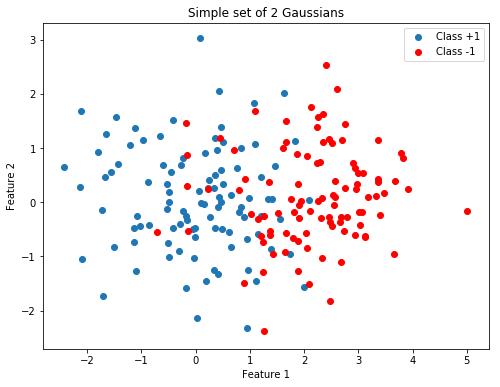

In [4]:
num_samples = 100
dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples)
label_a = np.ones(num_samples)
dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples)
label_b = -np.ones_like(label_a)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Simple set of 2 Gaussians")
plt.scatter(dats_a[:,0], dats_a[:,1], label='Class +1')
plt.scatter(dats_b[:,0], dats_b[:,1], label='Class -1', color='r')
plt.legend(loc='best')

data = np.append(dats_a, dats_b, axis=0)
labels = np.append(label_a, label_b)

f_star: 0
theta_star: 1.2051321537725832
j_star: 56
y_star: 1


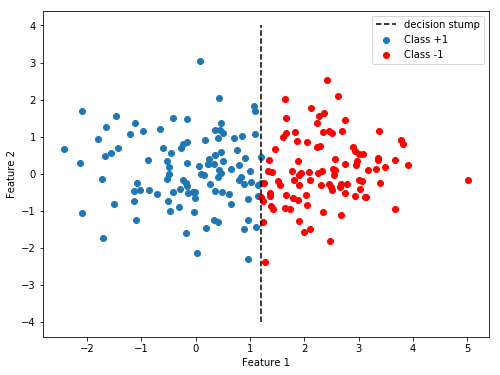

In [5]:
f_star, theta_star, y_star, pred_star, _ , j_star= stump(data, labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("j_star:", j_star)
print("y_star:", y_star)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(data[pred_star==1,0], data[pred_star==1,1], label= 'Class +1')
plt.scatter(data[pred_star==-1,0], data[pred_star==-1,1], color='r', label= 'Class -1')
yy = np.linspace(-4,4,100)
plt.plot(theta_star*np.ones(100), yy, 'k--', label='decision stump' )
plt.legend(loc='best')

f_star: 0
theta_star: 6.025660768862916
j_star: 56
y_star: 1


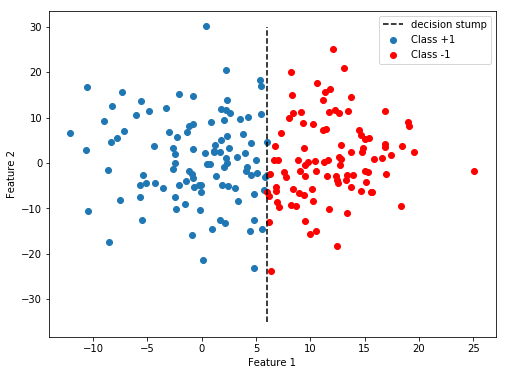

In [6]:
datas = np.array(data, copy=True)
datas[:,0] = data[:,0] * 5
datas[:,1] = data[:,1] * 10
#data[:,0] = data[:,0] * 3

f_star, theta_star, y_star, pred_star, _ , j_star= stump(datas, labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("j_star:", j_star)
print("y_star:", y_star)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(datas[pred_star==1,0], datas[pred_star==1,1], label= 'Class +1')
plt.scatter(datas[pred_star==-1,0], datas[pred_star==-1,1], color='r', label= 'Class -1')
yy = np.linspace(-35,30)
plt.plot(theta_star*np.ones(len(yy)), yy, 'k--', label='decision stump' )
plt.legend(loc='best')

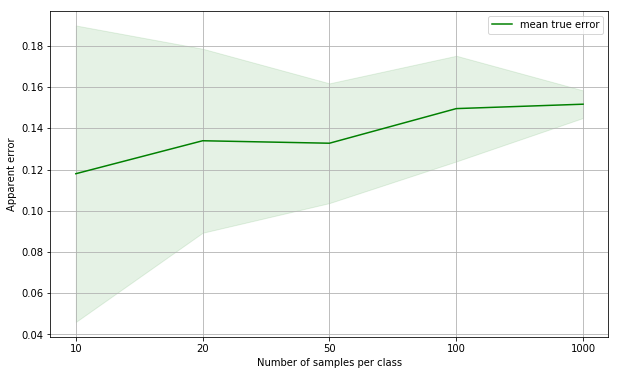

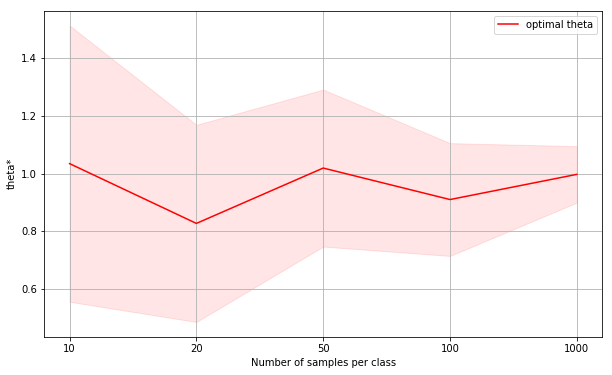

In [7]:
num_rep = 25
num_samples = np.array([10,20,50,100,1000])

mean_app_error = np.zeros(len(num_samples))
std_app_error = np.zeros(len(num_samples))
mean_theta = np.zeros(len(num_samples))
std_theta = np.zeros(len(num_samples))
for n in range(len(num_samples)): 
    app_error = np.zeros(num_rep)
    theta = np.zeros(num_rep)
    for i in range(num_rep):
        dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples[n])
        label_a = np.ones(num_samples[n])
        dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples[n])
        label_b = -np.ones_like(label_a)

        data = np.append(dats_a, dats_b, axis=0)
        labels = np.append(label_a, label_b)

        f_star, theta_star, y_star, pred_star, m, j_star= stump(data, labels)
        if f_star != 0 or y_star!=1:
            print("eeeeee")
        app_error[i] = m/len(labels)
        theta[i] = theta_star

    mean_app_error[n] = np.mean(app_error)
    std_app_error[n] = np.std(app_error)
    mean_theta[n] = np.mean(theta)
    std_theta[n] = np.std(theta)

aa = np.arange(len(num_samples))
plt.figure(figsize=(10,6))
plt.xlabel("Number of samples per class")
plt.ylabel("Apparent error")
plt.plot(aa, mean_app_error, color='g', label = "mean true error")
plt.fill_between(aa, mean_app_error - std_app_error,
                    mean_app_error + std_app_error, 
                 alpha=0.1, color="g")
labels = ['10', '20', '50', '100', '1000']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,6))
plt.xlabel("Number of samples per class")
plt.ylabel("theta*")
plt.plot(aa, mean_theta, color='r', label = "optimal theta")
plt.fill_between(aa, mean_theta - std_theta,
                    mean_theta + std_theta, 
                 alpha=0.1, color="r")
labels = ['10', '20', '50', '100', '1000']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')
plt.show()


## c) change priors

In [ ]:
num_samples_a = 160
num_samples_b = 40
dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples_a)
label_a = np.ones(num_samples_a)
dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples_b)
label_b = -np.ones(num_samples_b)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(dats_a[:,0], dats_a[:,1], label='Class +1')
plt.scatter(dats_b[:,0], dats_b[:,1], label='Class -1', color='r')
plt.legend(loc='best')

data = np.append(dats_a, dats_b, axis=0)
labels = np.append(label_a, label_b)

In [ ]:
f_star, theta_star, y_star, pred_star, _ , j_star= stump(data, labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("j_star:", j_star)
print("y_star:", y_star)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(data[pred_star==1,0], data[pred_star==1,1], label= 'Class +1')
plt.scatter(data[pred_star==-1,0], data[pred_star==-1,1], color='r', label= 'Class -1')
yy = np.linspace(-4,4,100)
plt.plot(theta_star*np.ones(100), yy, 'k--', label='decision stump' )
plt.legend(loc='best')

In [ ]:
datas = np.array(data, copy=True)
datas[:,0] = data[:,0] * 5
datas[:,1] = data[:,1] * 10
#data[:,0] = data[:,0] * 3

f_star, theta_star, y_star, pred_star, _ , j_star= stump(datas, labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("j_star:", j_star)
print("y_star:", y_star)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(datas[pred_star==1,0], datas[pred_star==1,1], label= 'Class +1')
plt.scatter(datas[pred_star==-1,0], datas[pred_star==-1,1], color='r', label= 'Class -1')
yy = np.linspace(-35,30)
plt.plot(theta_star*np.ones(len(yy)), yy, 'k--', label='decision stump' )
plt.legend(loc='best')

In [ ]:
num_rep = 25
num_samples = np.array([40,100,200,2000])

mean_app_error = np.zeros(len(num_samples))
std_app_error = np.zeros(len(num_samples))
mean_theta = np.zeros(len(num_samples))
std_theta = np.zeros(len(num_samples))
for n in range(len(num_samples)): 
    app_error = np.zeros(num_rep)
    theta = np.zeros(num_rep)
    for i in range(num_rep):
        num_a = np.round(0.8*num_samples[n]).astype(int)
        dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_a)
        label_a = np.ones(num_a)
        dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples[n]-num_a)
        label_b = -np.ones(num_samples[n]-num_a)
        #print(label_b.shape)

        data = np.append(dats_a, dats_b, axis=0)
        labels = np.append(label_a, label_b)
        #print(data.shape)
        #print(labels.shape)

        f_star, theta_star, y_star, pred_star, m, j_star= stump(data, labels)
        if f_star != 0:
            print("eeeeee:")
        if y_star != 1:
            print("oeoeoe:")
        app_error[i] = m/len(labels)
        theta[i] = theta_star

    mean_app_error[n] = np.mean(app_error)
    std_app_error[n] = np.std(app_error)
    mean_theta[n] = np.mean(theta)
    std_theta[n] = np.std(theta)

aa = np.arange(len(num_samples))
plt.figure(figsize=(10,6))
plt.xlabel("Total number of training samples")
plt.ylabel("Apparent error")
plt.plot(aa, mean_app_error, color='g', label = "mean true error")
plt.fill_between(aa, mean_app_error - std_app_error,
                    mean_app_error + std_app_error, 
                 alpha=0.1, color="g")
labels = ['40', '100', '200', '2000']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,6))
plt.xlabel("Total number of training samples")
plt.ylabel("theta*")
plt.plot(aa, mean_theta, color='r', label = "optimal theta")
plt.fill_between(aa, mean_theta - std_theta,
                    mean_theta + std_theta, 
                 alpha=0.1, color="r")
labels = ['40', '100', '200', '2000']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')
plt.show()


## d) 

(1125, 64) (1125,)
(100, 64) (100,) (1025, 64) (1025,)
Variance [0.         0.0106695  0.20810181 0.31267133 0.24841027 0.29813377
 0.07898792 0.         0.         0.09707258 0.36206252 0.26930306
 0.24324556 0.31892725 0.12994104 0.         0.01333323 0.19581623
 0.34382197 0.38913974 0.43099695 0.33290056 0.16672406 0.
 0.0041737  0.20876999 0.29194834 0.44780553 0.46745645 0.31259099
 0.22389749 0.         0.         0.19972869 0.329706   0.4370003
 0.46595546 0.31045882 0.246262   0.         0.         0.14850783
 0.38598272 0.41707161 0.43701974 0.33688231 0.24713634 0.
 0.         0.06984752 0.37100387 0.31873513 0.25831063 0.33132287
 0.20628417 0.06217283 0.         0.0114538  0.20300823 0.31037502
 0.19057347 0.3283751  0.21711695 0.13638463]


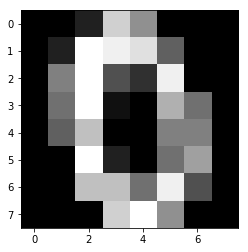

In [22]:
import os 
import glob

fname = os.path.join(r'..', r'data', r'optdigitsubset.txt')
data = np.loadtxt(fname)
labels = np.append(np.ones(554), -np.ones(571))
print(data.shape, labels.shape)

train_data = np.array(data[0:50,:], copy=True)
train_data = np.append(train_data, data[554:604,:], 0)

test_data = np.array(data[50:554,:], copy=True)
test_data = np.append(test_data, data[604:,:], 0)
test_labels = np.array(labels[50:554])
test_labels = np.append(test_labels, labels[604:])
train_labels = np.ones(100)
train_labels[50:] = -1
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

i = 10
plt.imshow(np.reshape(train_data[i], (8, 8)), cmap='gray')
#print(np.reshape(train_data[i], (8, 8)))

In [28]:
f_star, theta_star, y_star, pred_star, m, j_star= stump(train_data, train_labels)
app_error = m/len(train_labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("y_star:", y_star)
print("j_star:", j_star)
print("Apparent Error:", app_error)

pred = np.ones_like(test_labels)
pred[test_data[:,f_star] > theta_star] = -1
true_error = np.sum(pred != test_labels)/len(test_labels)
print("True Error:", true_error)

f_star: 36
theta_star: 0.06274509803921569
thres: 0.06274509803921569
y_star: 1
j_star: 20
Apparent Error: 0.01
True Error: 0.0175609756097561


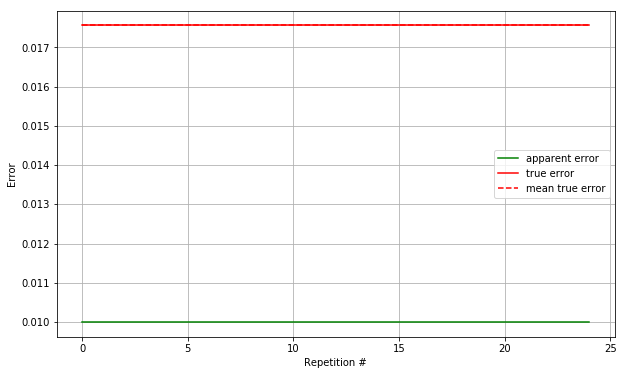

In [24]:
num_rep = 25
app_error = np.zeros(num_rep)
true_error = np.zeros_like(app_error)
for i in range(num_rep):    
    f_star, theta_star, y_star, pred_star, m, j_star= stump(train_data, train_labels)
    app_error[i] = m/len(train_labels)
    pred = np.ones(len(test_labels))
    if y_star == 0:
        pred[test_data[:,f_star] < theta_star] = -1
    else:
        pred[test_data[:,f_star] > theta_star] = -1
    true_error[i] = np.sum(pred != test_labels)/len(test_labels)

mean_app_error = np.mean(app_error)
std_app_error = np.std(app_error)
mean_true_error = np.mean(true_error)
std_true_error = np.std(true_error)

aa = np.arange(num_rep)
plt.figure(figsize=(10,6))
plt.xlabel("Repetition #")
plt.ylabel("Error")
plt.plot(aa, app_error, color = 'g',label = 'apparent error')
plt.fill_between(aa, mean_app_error*np.ones(num_rep) - std_app_error*np.ones(num_rep),
                    mean_app_error*np.ones(num_rep) + std_app_error*np.ones(num_rep), 
                 alpha=0.1, color="g")
plt.plot(aa, true_error, color = 'r', label = 'true error')
plt.plot(aa, mean_true_error*np.ones(num_rep), 'r--', label = "mean true error")
plt.fill_between(aa, mean_true_error*np.ones(num_rep) - std_true_error*np.ones(num_rep),
                    mean_true_error*np.ones(num_rep) + std_true_error*np.ones(num_rep), 
                 alpha=0.1, color="r")
plt.grid()
plt.legend(loc='best')

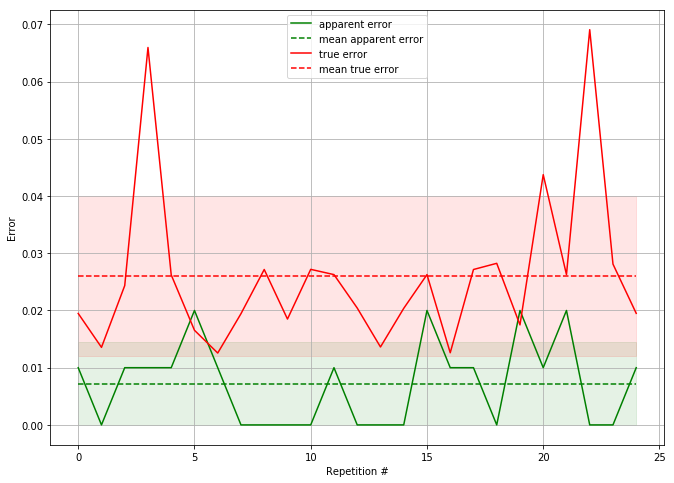

In [30]:
num_rep = 25
num_zeros = 554
app_error = np.zeros(num_rep)
true_error = np.zeros_like(app_error)
for i in range(num_rep):
    ii = np.random.randint(0, num_zeros, 50)
    ii = np.append(ii, np.random.randint(num_zeros, len(data), 50))
    train_data = data[ii,:]
    train_labels = labels[ii]
    test_data = np.delete(data, ii, 0)
    test_labels = np.delete(labels, ii)
    
    f_star, theta_star, y_star, pred_star, m, j_star= stump(train_data, train_labels)
    app_error[i] = m/len(train_labels)
    pred = np.ones(len(test_labels))
    if y_star == 0:
        pred[test_data[:,f_star] < theta_star] = -1
    else:
        pred[test_data[:,f_star] > theta_star] = -1
    true_error[i] = np.sum(pred != test_labels)/len(test_labels)

mean_app_error = np.mean(app_error)
std_app_error = np.std(app_error)
mean_true_error = np.mean(true_error)
std_true_error = np.std(true_error)

aa = np.arange(num_rep)
plt.figure(figsize=(11,8))
plt.xlabel("Repetition #")
plt.ylabel("Error")

plt.plot(aa, app_error, color = 'g',label = 'apparent error')
plt.plot(aa, mean_app_error*np.ones(num_rep), 'g--', label = "mean apparent error")
plt.fill_between(aa, mean_app_error*np.ones(num_rep) - std_app_error*np.ones(num_rep),
                    mean_app_error*np.ones(num_rep) + std_app_error*np.ones(num_rep), 
                 alpha=0.1, color="g")

plt.plot(aa, true_error, color = 'r', label = 'true error')
plt.plot(aa, mean_true_error*np.ones(num_rep), 'r--', label = "mean true error")
plt.fill_between(aa, mean_true_error*np.ones(num_rep) - std_true_error*np.ones(num_rep),
                    mean_true_error*np.ones(num_rep) + std_true_error*np.ones(num_rep), 
                 alpha=0.1, color="r")
plt.grid()
plt.legend(loc='best')

### Data normalization

(1125, 64) (1125,)
(100, 64) (100,) (1025, 64) (1025,)
Variance: [0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[[0.         0.         0.60302308 2.60876583 2.27327917 0.
  0.         0.        ]
 [0.         1.29274611 2.76195392 3.49485986 3.61129452 1.18042779
  0.         0.        ]
 [0.         2.56342783 2.90848198 0.80620266 0.43674391 2.82720005
  0.         0.        ]
 [0.         2.1038258  3.42526351 0.14011685 0.         2.20798452
  1.96168204 0.        ]
 [0.         1.8849099  2.2836745  0.         0.         1.61683534
  2.03832007 0.        ]
 [0.         0.         2.59078954 0.30088405 0.         1.30376594
  2.53888596 0.        ]
 [0.         0.         2.02946986 2.3622786  1.70033917 2.84066252
  1.52084133 0.        ]
 [0.         0.         0.         2.62806674 5.24732004 1.71969762
  0.         0.        ]]


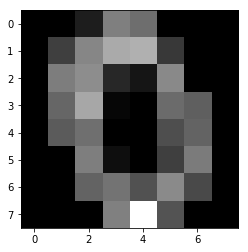

In [45]:
import os 
import glob
from sklearn.preprocessing import StandardScaler

fname = os.path.join(r'..', r'data', r'optdigitsubset.txt')
data = np.loadtxt(fname)

scaler = StandardScaler(with_mean = False, with_std = True)
scaler.fit(data)
data = scaler.transform(data)

labels = np.append(np.ones(554), -np.ones(571))
print(data.shape, labels.shape)

train_data = np.array(data[0:50,:], copy=True)
train_data = np.append(train_data, data[554:604,:], 0)

test_data = np.array(data[50:554,:], copy=True)
test_data = np.append(test_data, data[604:,:], 0)
test_labels = np.array(labels[50:554])
test_labels = np.append(test_labels, labels[604:])
train_labels = np.ones(100)
train_labels[50:] = -1
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Variance:", np.std(data, 0))

i = 10
plt.imshow(np.reshape(train_data[i], (8, 8)), cmap='gray')
print(np.reshape(train_data[i], (8, 8)))

f_star: 36
theta_star: 0.13465900493554284
y_star: 1
j_star: 20
Apparent Error: 0.01
True Error: 0.0175609756097561


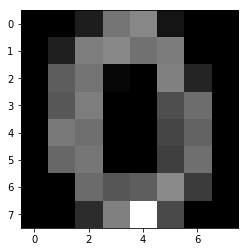

In [49]:
f_star, theta_star, y_star, pred_star, m, j_star= stump(train_data, train_labels)
app_error = m/len(train_labels)
print("f_star:", f_star)
print("theta_star:", theta_star)
print("y_star:", y_star)
print("j_star:", j_star)
print("Apparent Error:", app_error)

pred = np.ones_like(test_labels)
pred[test_data[:,f_star] > theta_star] = -1
true_error = np.sum(pred != test_labels)/len(test_labels)
print("True Error:", true_error)
#plt.imshow(np.reshape(train_data[8], (8, 8)), cmap='gray')

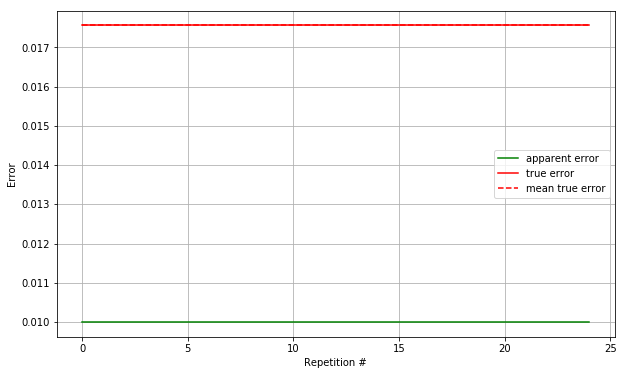

In [47]:
num_rep = 25
app_error = np.zeros(num_rep)
true_error = np.zeros_like(app_error)
for i in range(num_rep):    
    f_star, theta_star, y_star, pred_star, m, j_star= stump(train_data, train_labels)
    app_error[i] = m/len(train_labels)
    pred = np.ones(len(test_labels))
    if y_star == 0:
        pred[test_data[:,f_star] < theta_star] = -1
    else:
        pred[test_data[:,f_star] > theta_star] = -1
    true_error[i] = np.sum(pred != test_labels)/len(test_labels)

mean_app_error = np.mean(app_error)
std_app_error = np.std(app_error)
mean_true_error = np.mean(true_error)
std_true_error = np.std(true_error)

aa = np.arange(num_rep)
plt.figure(figsize=(10,6))
plt.xlabel("Repetition #")
plt.ylabel("Error")
plt.plot(aa, app_error, color = 'g',label = 'apparent error')
plt.fill_between(aa, mean_app_error*np.ones(num_rep) - std_app_error*np.ones(num_rep),
                    mean_app_error*np.ones(num_rep) + std_app_error*np.ones(num_rep), 
                 alpha=0.1, color="g")
plt.plot(aa, true_error, color = 'r', label = 'true error')
plt.plot(aa, mean_true_error*np.ones(num_rep), 'r--', label = "mean true error")
plt.fill_between(aa, mean_true_error*np.ones(num_rep) - std_true_error*np.ones(num_rep),
                    mean_true_error*np.ones(num_rep) + std_true_error*np.ones(num_rep), 
                 alpha=0.1, color="r")
plt.grid()
plt.legend(loc='best')

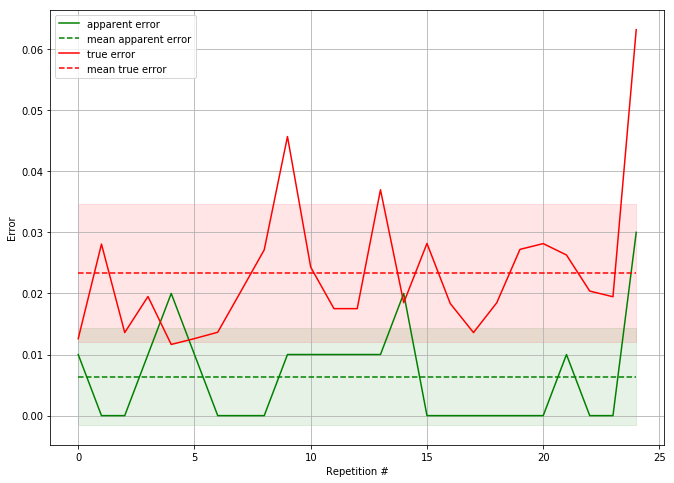

In [51]:
num_rep = 25
num_zeros = 554
app_error = np.zeros(num_rep)
true_error = np.zeros_like(app_error)
for i in range(num_rep):
    ii = np.random.randint(0, num_zeros, 50)
    ii = np.append(ii, np.random.randint(num_zeros, len(data), 50))
    train_data = data[ii,:]
    train_labels = labels[ii]
    test_data = np.delete(data, ii, 0)
    test_labels = np.delete(labels, ii)
    
    f_star, theta_star, y_star, pred_star, m, j_star= stump(train_data, train_labels)
    app_error[i] = m/len(train_labels)
    pred = np.ones(len(test_labels))
    if y_star == 0:
        pred[test_data[:,f_star] < theta_star] = -1
    else:
        pred[test_data[:,f_star] > theta_star] = -1
    true_error[i] = np.sum(pred != test_labels)/len(test_labels)

mean_app_error = np.mean(app_error)
std_app_error = np.std(app_error)
mean_true_error = np.mean(true_error)
std_true_error = np.std(true_error)

aa = np.arange(num_rep)
plt.figure(figsize=(11,8))
plt.xlabel("Repetition #")
plt.ylabel("Error")

plt.plot(aa, app_error, color = 'g',label = 'apparent error')
plt.plot(aa, mean_app_error*np.ones(num_rep), 'g--', label = "mean apparent error")
plt.fill_between(aa, mean_app_error*np.ones(num_rep) - std_app_error*np.ones(num_rep),
                    mean_app_error*np.ones(num_rep) + std_app_error*np.ones(num_rep), 
                 alpha=0.1, color="g")

plt.plot(aa, true_error, color = 'r', label = 'true error')
plt.plot(aa, mean_true_error*np.ones(num_rep), 'r--', label = "mean true error")
plt.fill_between(aa, mean_true_error*np.ones(num_rep) - std_true_error*np.ones(num_rep),
                    mean_true_error*np.ones(num_rep) + std_true_error*np.ones(num_rep), 
                 alpha=0.1, color="r")
plt.grid()
plt.legend(loc='best')

## e)

In [8]:
# The function weighted_stump is the implementation of the weighted
# version of the Weak Learner. Uses as inputs a set of labelled points 
#(labels:+1,-1), along with a set of weights for each object, performing 
# an exhaustive search for the optimal values f*, theta*, y*, minimizing 
# training error (number of misclassified objects).
# The function returns these optimal values in scalars f_star,
# theta_star, y_star, as well as the output hypothesis of the 
# stump in pred_star, the number of misclassified objects in m and the
# index of the sample giving the optimal theta in j_star.
def weighted_stump(data, labels, weights):
    m = len(labels)
    for i in range(data.shape[1]):
        for j in range(data.shape[0]):
            pred = np.ones((2, data.shape[0]))
            pred[0, data[:,i]<data[j,i]] = -1
            pred[1, data[:,i]>data[j,i]] = -1
            
            # object weight are now incorporated and the decision stump now
            # minimizes the weighted classification error 
            ii = np.argmin(np.sum(weights * np.not_equal(pred, labels), axis=1))
            min_ii = np.amin(np.sum(weights * np.not_equal(pred, labels), axis=1))
            if min_ii < m:
                m = min_ii
                f_star = i
                theta_star = data[j,i]
                j_star = j
                y_star = ii
                pred_star = np.array(pred[y_star,:], copy=True)
                
    return f_star, theta_star, y_star, pred_star, m, j_star

In [82]:
# assign a bigger weight to the second Gaussian, so the stump moves to the left
num_samples = 100
dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples)
label_a = np.ones(num_samples)
dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples)
label_b = -np.ones_like(label_a)
data = np.append(dats_a, dats_b, axis=0)
labels = np.append(label_a, label_b)

weights = np.ones(data.shape[0])
weights[100:] *= 10
#weights /= np.sum(weights)
print(data.shape, weights.shape)

(200, 2) (200,)


f_star: 0
theta_star: -0.3072853299089661
j_star: 91
y_star: 1


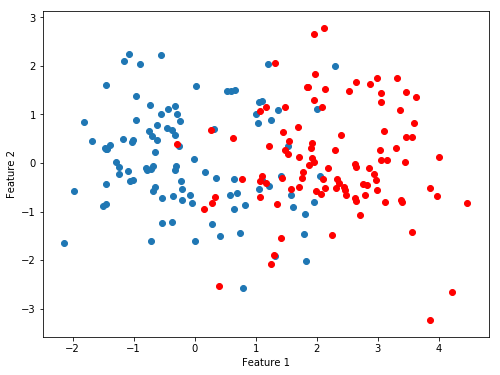

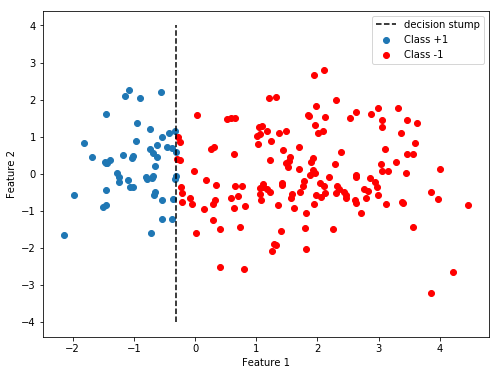

In [69]:
weights = np.ones(data.shape[0])
weights[100:] *= 100
weights /= np.sum(weights)
f_star, theta_star, y_star, pred_star, m, j_star = weighted_stump(data, labels, weights)

print("f_star:", f_star)
print("theta_star:", theta_star)
print("j_star:", j_star)
print("y_star:", y_star)

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(data[:100,0], data[:100,1], label= 'Class +1')
plt.scatter(data[100:,0], data[100:,1], color='r', label= 'Class -1')
plt.show()

plt.figure(figsize=(8, 6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(data[pred_star==1,0], data[pred_star==1,1], label= 'Class +1')
plt.scatter(data[pred_star==-1,0], data[pred_star==-1,1], color='r', label= 'Class -1')
yy = np.linspace(-4,4,100)
plt.plot(theta_star*np.ones(100), yy, 'k--', label='decision stump' )
plt.legend(loc='best')
plt.show()

## f) Adaboost

In [117]:
num_samples = 100
dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples)
label_a = np.ones(num_samples)
dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples)
label_b = -np.ones_like(label_a)
data = np.append(dats_a, dats_b, axis=0)
labels = np.append(label_a, label_b)

print(data.shape, weights.shape)


(200, 2) (200,)


In [118]:
# Implementation of the Adaptive Boosting classifier. The function 
# train_AdaBoost using as inputs the scalar K as th number of iterations
# or equivalently the number of weak learners the boosting classifier
# utilizes, as well as data and labels a set of labelled points for the
# training of the classifier. As the weak learner the weighted stump is 
# used. The function outputs the set of the optimal parameters obtained
# for each weighted stump as well as the final output hypothesis of the
# ensemble classifier in pred.
def train_AdaBoost(K, data, labels):
    
    # For storing the optimal parameters of weak learners
    f_star = np.zeros(K, dtype = int)
    theta_star = np.zeros_like(f_star)
    y_star = np.zeros_like(f_star)
    f = np.zeros((K, data.shape[0]))
    
    # Initialize weights and alphas
    weights = np.ones(data.shape[0])
    alpha = np.zeros(K)
    alpha = alpha[:,np.newaxis]
    
    # Small factor inserted to avoid division by zero
    # in calculation of alphas
    ff = 1e-16
    
    # For iterations K extract the misclassification error of the weak learner
    # extract alpha of the weak learner, add the output hypothesis f of the stump,
    # update alphas and the weights.
    for i in range(K):
        f_star[i], theta_star[i], y_star[i], f[i], epsilon_k, _ = weighted_stump(data, labels, weights)   
        alpha[i]  = 0.5 * np.log((np.sum(weights))/(epsilon_k + ff) - 1)
        weights = np.exp(-labels * np.sum(alpha[:i+1] * f[:i+1], axis = 0))
     
    # Output hypothesis of Adaboost, equal to sign(alpha*f)
    pred = np.sum(alpha*f, axis=0)
    pred[pred>=0] = 1
    pred[pred<0] = -1
    
    return f_star, theta_star, y_star, alpha, f, pred, weights

# Prediction of labels of unseen data by the AdaBoost classifier. Uses as
# input the optimal parameters f_star, theta_star, y_star of the weak learners
# utilised by the ensemble classifier, as well as the corresponding weights
# (significance) of each learner and the unseen data test_data for prediction.
# The function outputs the output hypothesis h of the Adaboost classifier.
def predict_AdaBoost(f_star, theta_star, y_star, alpha, test_data):
    
    # Initialize the sum to store the contribution from each learner
    pred = np.zeros(test_data.shape[0])
    
    # Calculate (alpha*f) for each classifier, where f(+1, -1) is given
    # according to the position of points with respect to the boundary
    # of the respective weighted decision stump.
    for i in range(len(f_star)):
        pr = alpha[i] * np.ones_like(pred)
        if y_star[i] == 0:
            pr[test_data[:,f_star[i]] < theta_star[i]] = -alpha[i]
        else:
            pr[test_data[:,f_star[i]] > theta_star[i]] = -alpha[i]
        pred += pr
    
    # Output hypothesis for unseen data equal to sign(sum(alpha*f))
    h = np.ones_like(pred)
    h[pred < 0] = -1
        
    return h

def train_AdaBoost2(K, data, labels):
    
    f_star = np.zeros(K, dtype = int)
    theta_star = np.zeros_like(f_star)
    y_star = np.zeros_like(f_star)
    
    weights = np.ones(data.shape[0])
    beta = np.zeros(K)
    beta = beta[:,np.newaxis]
    f = np.zeros((K, data.shape[0]))
    
    for i in range(K):
        p = weights/(np.sum(weights)+ 1e-16)
        f_star[i], theta_star[i], y_star[i], f[i], epsilon_k = weighted_stump(data, labels, p)   
        beta[i] = epsilon_k/(1-epsilon_k + 1e-16)
        weights = weights * np.power(beta[i], 1-np.not_equal(f[i], labels).astype(int))
        
    pred = np.ones_like(labels)
    pred[np.sum(np.log(1/(beta + 1e-16))*f, axis=0) < 0.5*np.sum(np.log(1/(beta + 1e-16)))] = -1
    return f_star, theta_star, y_star, beta, f, pred, weights



def predict_Adaboost2(f_star, theta_star, y_star, beta, train_data, test_data):
    pred = np.zeros(test_data.shape[0])
    for i in range(len(f_star)):
        pr = np.log(1/(beta[i] + 1e-16)) * np.ones_like(pred)
        if y_star[i] == 0:
            pr[test_data[:,f_star[i]] < theta_star[i]] = -np.log(1/(beta[i] + 1e-16))
        else:
            pr[test_data[:,f_star[i]] > theta_star[i]] = -np.log(1/(beta[i] + 1e-16))
        pred += pr
    
    h = np.ones_like(pred)
    h[pred < 0.5*np.sum(np.log(1/(beta + 1e-16)))] = -1
        
    return h
        

In [119]:
f_star, theta_star, y_star, alpha, f, pred, weights = train_AdaBoost(100, data, labels)

In [90]:
print(f_star)
print(theta_star)
print(y_star)
print(min(weights))

[0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0
 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[ 1  2  0  0  0  2  0  2  0  0  0  0  0  1  2  1  0  0  0  0  0  1  1  0
  2  0  0  0  0  1  0  0  0  0  0  0  0  1  2  0 -1  1  0  0  0  0  1  0
  0  0  0  2 -2  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  1 -2  2  1
  1  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  1  1  1  1  1  0  0  0  0
  0  0  0  0]
[1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
0.024403287172603406


## g)

In [126]:
# Simple dataset testing
num_samples = 1000
a = np.random.randint(0, num_samples)
print(a)

test_a = np.random.multivariate_normal([0,0], np.eye(2), a)
test_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples-a)
test_data = np.append(test_a, test_b, axis=0)

test_labels = np.ones(num_samples)
test_labels[a:] = -1

h = predict_AdaBoost(f_star, theta_star, y_star, alpha, test_data)

659


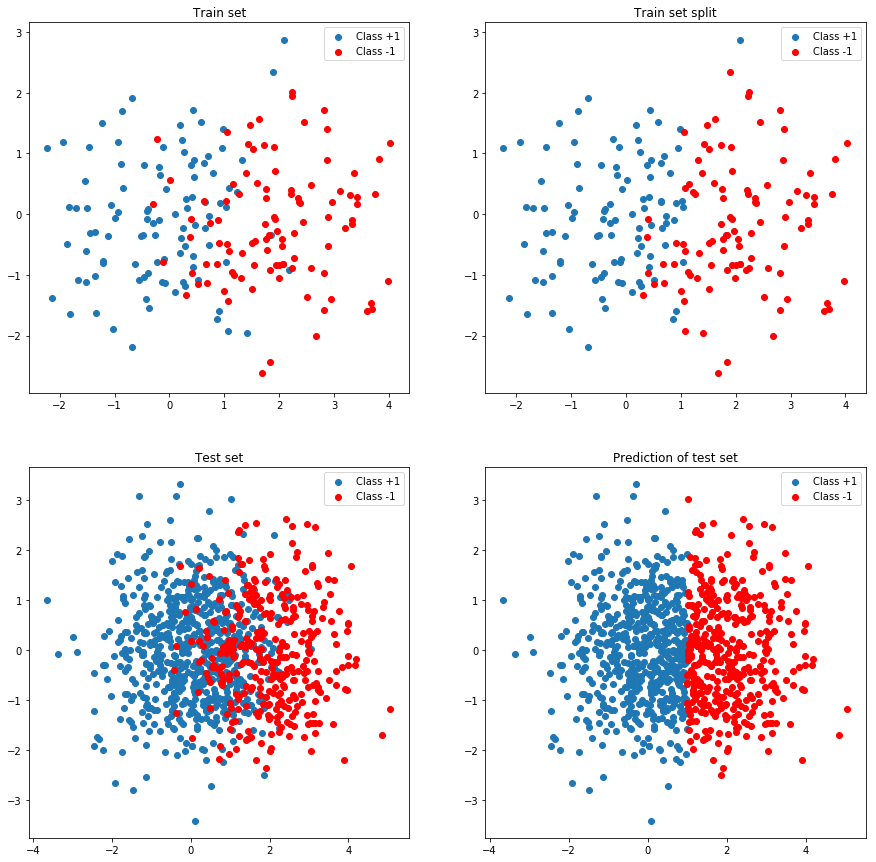

In [128]:
f, ax = plt.subplots(2,2)
f.set_figheight(15)
f.set_figwidth(15)

ax[0,0].scatter(data[:100,0], data[:100,1], label='Class +1')
ax[0,0].scatter(data[100:,0], data[100:,1], label='Class -1', color='r')
ax[0,0].set_title("Train set")
ax[0,0].legend(loc='best')

ax[0,1].scatter(data[pred==1,0], data[pred==1,1], label='Class +1')
ax[0,1].scatter(data[pred==-1,0], data[pred==-1,1], color='r', label='Class -1')
ax[0,1].set_title("Train set split")
ax[0,1].legend(loc='best')

ax[1,0].scatter(test_data[:a,0], test_data[:a,1], label='Class +1')
ax[1,0].scatter(test_data[a:,0], test_data[a:,1], color='r', label='Class -1')
ax[1,0].set_title("Test set")
ax[1,0].legend(loc='best')

ax[1,1].scatter(test_data[h==1,0], test_data[h==1,1], label = 'Class +1')
ax[1,1].scatter(test_data[h==-1,0], test_data[h==-1,1], color='r', label = 'Class -1')
ax[1,1].set_title("Prediction of test set")
ax[1,1].legend(loc='best')

13


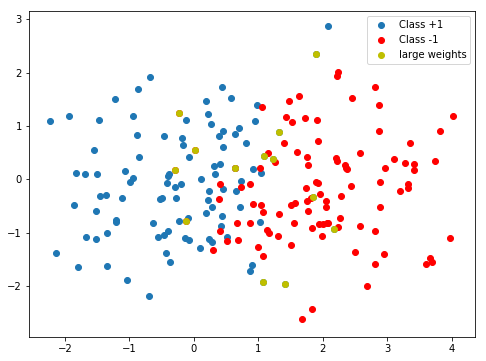

In [129]:
# Test the weights significance
ii_sorted = weights>=0.5*max(weights)
print(np.sum(ii_sorted))

plt.figure(figsize=(8,6))
plt.scatter(data[labels==1,0], data[labels==1,1], label='Class +1')
plt.scatter(data[labels==-1,0], data[labels==-1,1], color = "r",label='Class -1')
plt.scatter(data[ii_sorted,0], data[ii_sorted,1], color = "y",label='large weights')
plt.legend(loc='best')

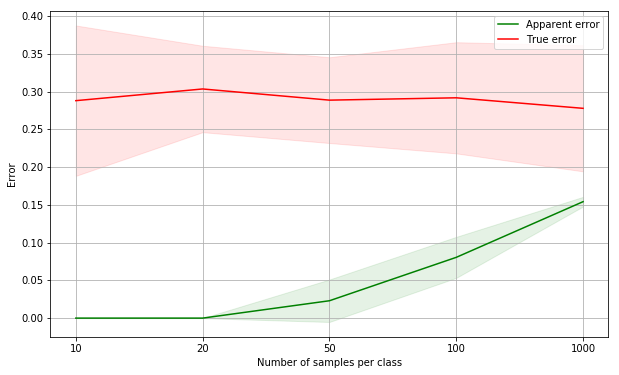

In [130]:
num_rep = 20
num_samples = np.array([10,20,50,100, 1000])

mean_app_error = np.zeros(len(num_samples))
std_app_error = np.zeros(len(num_samples))
mean_true_error = np.zeros_like(mean_app_error)
std_true_error = np.zeros_like(std_app_error)
for n in range(len(num_samples)): 
    app_error = np.zeros(num_rep)
    true_error = np.zeros(num_rep)
    for i in range(num_rep):
        dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples[n])
        label_a = np.ones(num_samples[n])
        dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples[n])
        label_b = -np.ones_like(label_a)

        data = np.append(dats_a, dats_b, axis=0)
        labels = np.append(label_a, label_b)

        f_star, theta_star, y_star, alpha, f, pred, weights = train_AdaBoost(100, data, labels)
        app_error[i] = np.sum(np.not_equal(pred,labels))/len(labels)
        h = predict_AdaBoost(f_star, theta_star, y_star, alpha, test_data)
        true_error[i] = np.sum(np.not_equal(h,test_labels))/len(test_labels)

    mean_app_error[n] = np.mean(app_error)
    std_app_error[n] = np.std(app_error)
    mean_true_error[n] = np.mean(true_error)
    std_true_error[n] = np.std(true_error)

aa = np.arange(len(num_samples))
plt.figure(figsize=(10,6))
plt.xlabel("Number of samples per class")
plt.ylabel("Error")

plt.plot(aa, mean_app_error, 'g', label = "Apparent error")
plt.fill_between(aa, mean_app_error - std_app_error,
                    mean_app_error + std_app_error, 
                 alpha=0.1, color="g")
plt.plot(aa, mean_true_error, 'r', label = "True error")
plt.fill_between(aa, mean_true_error - std_true_error,
                    mean_true_error + std_true_error, 
                 alpha=0.1, color="r")

labels = ['10', '20', '50', '100', '1000']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')

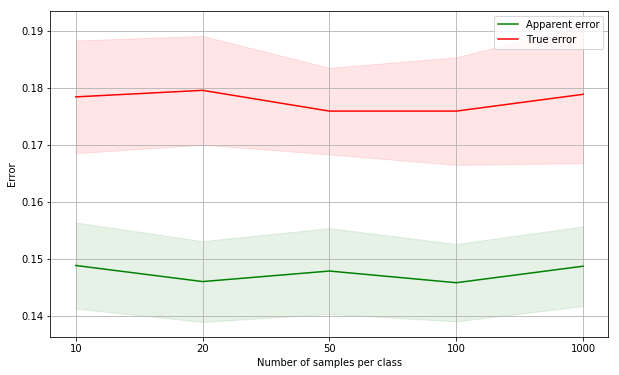

In [133]:
from sklearn.ensemble import AdaBoostClassifier as Adaboost

num_samples = np.array([10,20,50,100, 1000])
num_rep = 20

mean_app_error = np.zeros(len(num_samples))
std_app_error = np.zeros(len(num_samples))
mean_true_error = np.zeros_like(mean_app_error)
std_true_error = np.zeros_like(mean_app_error)

for i in range(len(num_samples)):
    app_error = np.zeros(num_rep)
    true_error = np.zeros(num_rep)
    for j in range(num_rep):
        dats_a = np.random.multivariate_normal([0,0], np.eye(2), num_samples[n])
        label_a = np.ones(num_samples[n])
        dats_b = np.random.multivariate_normal([2,0], np.eye(2), num_samples[n])
        label_b = -np.ones_like(label_a)

        train_data = np.append(dats_a, dats_b, axis=0)
        train_labels = np.append(label_a, label_b)
        
        clf = Adaboost(n_estimators = 100)
        clf.fit(train_data, train_labels)
        pred = clf.predict(train_data)
        app_error[j] = np.sum(np.not_equal(pred, train_labels))/len(train_labels)
        pred = clf.predict(test_data)
        true_error[j] = np.sum(np.not_equal(pred,test_labels))/len(test_labels)
    
    mean_app_error[i] = np.mean(app_error)
    std_app_error[i] = np.std(app_error)
    mean_true_error[i] = np.mean(true_error)
    std_true_error[i] = np.std(true_error)

aa = np.arange(len(num_samples))
plt.figure(figsize=(10,6))
plt.xlabel("Number of samples per class")
plt.ylabel("Error")

plt.plot(aa, mean_app_error, 'g', label = "Apparent error")
plt.fill_between(aa, mean_app_error - std_app_error,
                    mean_app_error + std_app_error, 
                 alpha=0.1, color="g")
plt.plot(aa, mean_true_error, 'r', label = "True error")
plt.fill_between(aa, mean_true_error - std_true_error,
                    mean_true_error + std_true_error, 
                 alpha=0.1, color="r")

labels = ['10', '20', '50', '100', '1000']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')

### Banana set

(200, 2) (200,) (1000, 2) (1000,)
504 496


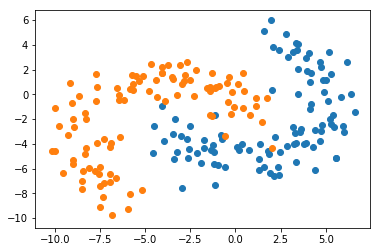

In [161]:
from scipy import io
import os

fname = os.path.join(r'..', r'data', r'bdata')
a = io.loadmat(fname)
datab = np.array(a['adata'])
labelsb = np.array(a['labels']).astype(int)
labelsb[labelsb==1] = 1
labelsb[labelsb==2] = -1

num_samples = 100
num_test = 1000
train_ii = np.random.randint(0,5000,num_samples)
train_ii = np.append(train_ii, np.random.randint(5000,10000, num_samples))
train_data = datab[train_ii]
train_labels = labelsb[train_ii]

databb = np.delete(datab, train_ii, 0)
labelsbb = np.delete(labelsb, train_ii, 0)
test_ii = np.random.randint(0,len(labelsbb), num_test)
test_data = databb[test_ii]
test_labels = labelsbb[test_ii]

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(np.sum(test_labels==1), np.sum(test_labels==-1))
#del datab, labelsb

plt.figure()
plt.scatter(train_data[train_labels==1, 0], train_data[train_labels==1, 1], label='1')
plt.scatter(train_data[train_labels==-1, 0], train_data[train_labels==-1, 1], label='-1')

In [162]:
f_star, theta_star, y_star, beta, f, pred, weights = train_AdaBoost(100, train_data, train_labels)
h = predict_AdaBoost(f_star, theta_star, y_star, beta, test_data)

In [163]:
print(f_star)
print(theta_star)
print(y_star)

print(weights.shape)

[0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0]
[ 1 -4 -2  2 -4 -4 -4  2  0 -4  2  0 -4 -4 -4  2 -4  2  0 -4 -4 -4  2 -4
  2  2 -3 -4  1  0  0  2 -4 -4 -4  1 -1  2  2 -4 -4 -4 -3 -1  0  1  0 -4
  2 -4 -4 -4  1  0 -2 -1  2  2  2  1  0 -4 -3 -4  2 -4 -4 -4 -3 -1 -1 -4
  2  0  0  0  2  2  1  2  2 -4 -2 -1  0  0  0  2 -4 -4 -4  2  2 -3 -4  1
  0 -1 -1 -4]
[0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1
 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0]
(200,)


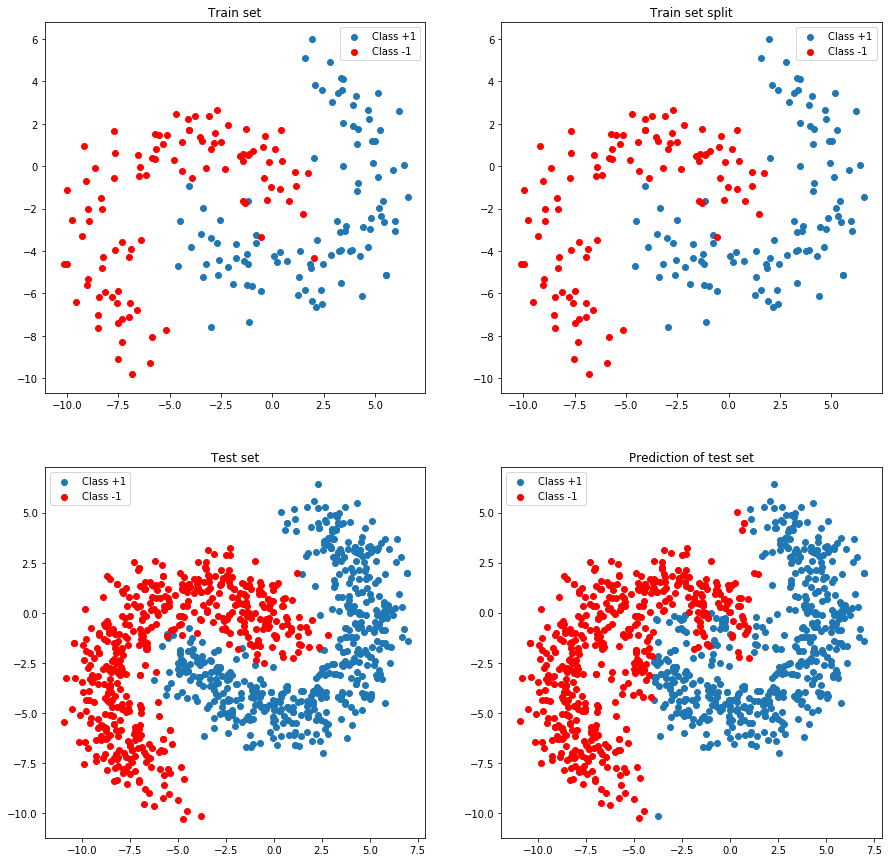

In [164]:
f, ax = plt.subplots(2,2)
f.set_figheight(15)
f.set_figwidth(15)

ax[0,0].scatter(train_data[:100,0], train_data[:100,1], label='Class +1')
ax[0,0].scatter(train_data[100:,0], train_data[100:,1], label='Class -1', color='r')
ax[0,0].set_title("Train set")
ax[0,0].legend(loc='best')

ax[0,1].scatter(train_data[pred==1,0], train_data[pred==1,1], label='Class +1')
ax[0,1].scatter(train_data[pred==-1,0], train_data[pred==-1,1], color='r', label='Class -1')
ax[0,1].set_title("Train set split")
ax[0,1].legend(loc='best')

ax[1,0].scatter(test_data[test_labels==1,0], test_data[test_labels==1,1], label='Class +1')
ax[1,0].scatter(test_data[test_labels==-1,0], test_data[test_labels==-1,1], color='r', label='Class -1')
ax[1,0].set_title("Test set")
ax[1,0].legend(loc='best')

ax[1,1].scatter(test_data[h==1,0], test_data[h==1,1], label = 'Class +1')
ax[1,1].scatter(test_data[h==-1,0], test_data[h==-1,1], color='r', label = 'Class -1')
ax[1,1].set_title("Prediction of test set")
ax[1,1].legend(loc='best')

13


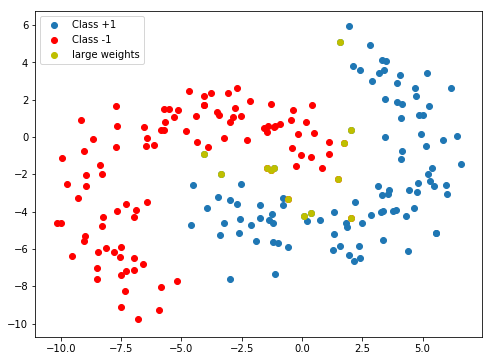

In [165]:
# Test the weights significance
ii_sorted = weights>=0.25*max(weights)
print(np.sum(ii_sorted))

plt.figure(figsize=(8,6))
plt.scatter(train_data[train_labels==1,0], train_data[train_labels==1,1], label='Class +1')
plt.scatter(train_data[train_labels==-1,0], train_data[train_labels==-1,1], color = "r",label='Class -1')
plt.scatter(train_data[ii_sorted,0], train_data[ii_sorted,1], color = "y",label='large weights')
plt.legend(loc='best')

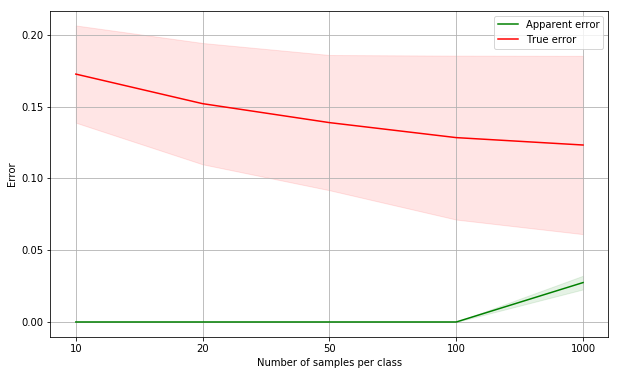

In [158]:
num_rep = 10
num_samples = np.array([10,20,50,100,1000])

mean_app_error = np.zeros(len(num_samples))
std_app_error = np.zeros(len(num_samples))
mean_true_error = np.zeros_like(mean_app_error)
std_true_error = np.zeros_like(std_app_error)
for n in range(len(num_samples)): 
    app_error = np.zeros(num_rep)
    theta = np.zeros(num_rep)
    for i in range(num_rep):
        train_ii = np.random.randint(0,5000,num_samples[n])
        train_ii = np.append(train_ii, np.random.randint(5000,10000, num_samples[n]))
        train_data = datab[train_ii]
        train_labels = labelsb[train_ii]

        f_star, theta_star, y_star, alpha, f, pred, weights = train_AdaBoost(100, train_data, train_labels)
        app_error[i] = np.sum(np.not_equal(pred,train_labels))/len(train_labels)
        h = predict_AdaBoost(f_star, theta_star, y_star, alpha, test_data)
        true_error[i] = np.sum(np.not_equal(h,test_labels))/len(test_labels)

    mean_app_error[n] = np.mean(app_error)
    std_app_error[n] = np.std(app_error)
    mean_true_error[n] = np.mean(true_error)
    std_true_error[n] = np.std(true_error)

aa = np.arange(len(num_samples))
plt.figure(figsize=(10,6))
plt.xlabel("Number of samples per class")
plt.ylabel("Error")

plt.plot(aa, mean_app_error, 'g', label = "Apparent error")
plt.fill_between(aa, mean_app_error - std_app_error,
                    mean_app_error + std_app_error, 
                 alpha=0.1, color="g")
plt.plot(aa, mean_true_error, 'r', label = "True error")
plt.fill_between(aa, mean_true_error - std_true_error,
                    mean_true_error + std_true_error, 
                 alpha=0.1, color="r")

labels = ['10','20', '50', '100', '1000']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')

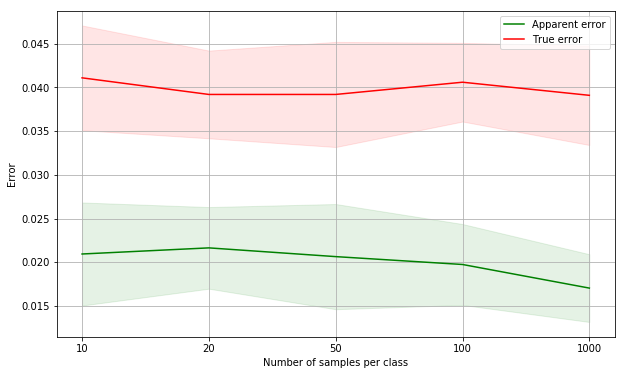

In [159]:
from sklearn.ensemble import AdaBoostClassifier as Adaboost

num_samples = np.array([10,20,50,100, 1000])
num_rep = 10

mean_app_error = np.zeros(len(num_samples))
std_app_error = np.zeros(len(num_samples))
mean_true_error = np.zeros_like(mean_app_error)
std_true_error = np.zeros_like(mean_app_error)

for i in range(len(num_samples)):
    app_error = np.zeros(num_rep)
    true_error = np.zeros(num_rep)
    for j in range(num_rep):
        train_ii = np.random.randint(0,5000,num_samples[n])
        train_ii = np.append(train_ii, np.random.randint(5000,10000, num_samples[n]))
        train_data = datab[train_ii]
        train_labels = labelsb[train_ii]
        
        clf = Adaboost(n_estimators = 100)
        clf.fit(train_data, train_labels)
        pred = clf.predict(train_data)
        app_error[j] = np.sum(np.not_equal(pred, train_labels))/len(train_labels)
        pred = clf.predict(test_data)
        true_error[j] = np.sum(np.not_equal(pred,test_labels))/len(test_labels)
    
    mean_app_error[i] = np.mean(app_error)
    std_app_error[i] = np.std(app_error)
    mean_true_error[i] = np.mean(true_error)
    std_true_error[i] = np.std(true_error)

aa = np.arange(len(num_samples))
plt.figure(figsize=(10,6))
plt.xlabel("Number of samples per class")
plt.ylabel("Error")

plt.plot(aa, mean_app_error, 'g', label = "Apparent error")
plt.fill_between(aa, mean_app_error - std_app_error,
                    mean_app_error + std_app_error, 
                 alpha=0.1, color="g")
plt.plot(aa, mean_true_error, 'r', label = "True error")
plt.fill_between(aa, mean_true_error - std_true_error,
                    mean_true_error + std_true_error, 
                 alpha=0.1, color="r")

labels = ['10', '20', '50', '100', '1000']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')

## h)

(1125, 64) (1125,)
(100, 64) (100,) (1025, 64) (1025,)


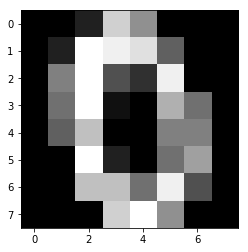

In [166]:
fname = os.path.join(r'..', r'data', r'optdigitsubset.txt')
data = np.loadtxt(fname)
labels = np.append(np.ones(554), -np.ones(571))
print(data.shape, labels.shape)

train_data = np.array(data[0:50,:], copy=True)
train_data = np.append(train_data, data[554:604,:], 0)

test_data = np.array(data[50:554,:], copy=True)
test_data = np.append(test_data, data[604:,:], 0)
test_labels = np.array(labels[50:554])
test_labels = np.append(test_labels, labels[604:])
train_labels = np.ones(100)
train_labels[50:] = -1
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

i = 10
plt.imshow(np.reshape(train_data[i], (8, 8)), cmap='gray')
#print(np.reshape(train_data[i], (8, 8)))

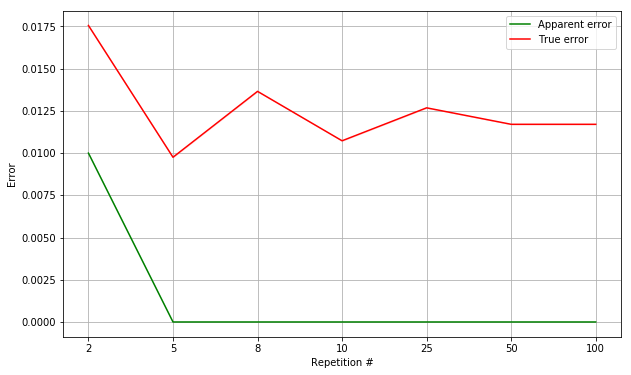

In [167]:
#T = np.array([2, 5, 8, 10, 25, 50, 100])
T = np.array([5, 8, 10, 25, 50, 100])
num_rep = 5

mean_app_error = np.zeros(len(T))
std_app_error = np.zeros(len(T))
mean_true_error = np.zeros_like(mean_app_error)
std_true_error = np.zeros_like(mean_app_error)

for i in range(len(T)):
    app_error = np.zeros(num_rep)
    true_error = np.zeros(num_rep)
    for j in range(num_rep):
        f_star, theta_star, y_star, alpha, f, pred, weights = train_AdaBoost(T[i], train_data, train_labels)
        app_error[j] = np.sum(np.not_equal(pred,train_labels))/len(train_labels)
        pred = predict_AdaBoost(f_star, theta_star, y_star, alpha, test_data)
        true_error[j] = np.sum(np.not_equal(pred,test_labels))/len(test_labels)
    
    mean_app_error[i] = np.mean(app_error)
    std_app_error[i] = np.std(app_error)
    mean_true_error[i] = np.mean(true_error)
    std_true_error[i] = np.std(true_error)

aa = np.arange(len(T))
plt.figure(figsize=(10,6))
plt.xlabel("Repetition #")
plt.ylabel("Error")
plt.plot(aa, mean_app_error, 'g', label = "Apparent error")
plt.fill_between(aa, mean_app_error - std_app_error,
                    mean_app_error + std_app_error, 
                 alpha=0.1, color="g")
plt.plot(aa, mean_true_error, 'r', label = "True error")
plt.fill_between(aa, mean_true_error - std_true_error,
                    mean_true_error + std_true_error, 
                 alpha=0.1, color="r")
labels = ['2', '5','8', '10', '25', '50','100']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')

In [169]:
f_star, theta_star, y_star, beta, f, pred, weights = train_AdaBoost(5, train_data, train_labels)
h = predict_AdaBoost(f_star, theta_star, y_star, beta, test_data)


In [181]:
print(weights)
print(max(weights))

[1.20732739e-03 6.59741744e-05 1.20732739e-03 6.59741744e-05
 6.59741744e-05 6.59741744e-05 6.59741744e-05 1.20732739e-03
 1.20732739e-03 1.20732739e-03 6.59741744e-05 1.20732739e-03
 1.20732739e-03 1.20732739e-03 6.59741744e-05 1.20732739e-03
 6.36650783e-03 6.53144327e-03 6.36650783e-03 6.36650783e-03
 1.20732739e-03 1.20732739e-03 1.20732739e-03 1.20732739e-03
 6.59741744e-05 6.59741744e-05 6.59741744e-05 1.20732739e-03
 6.36650783e-03 1.20732739e-03 1.20732739e-03 1.20732739e-03
 1.20732739e-03 6.59741744e-05 1.20732739e-03 1.20732739e-03
 1.20732739e-03 1.20732739e-03 1.20732739e-03 1.20732739e-03
 6.59741744e-05 1.20732739e-03 1.20732739e-03 1.20732739e-03
 1.20732739e-03 1.20732739e-03 1.20732739e-03 1.20732739e-03
 1.20732739e-03 1.20732739e-03 6.59741744e-05 1.20732739e-03
 6.59741744e-05 6.59741744e-05 1.20732739e-03 6.59741744e-05
 6.59741744e-05 6.59741744e-05 6.59741744e-05 6.59741744e-05
 6.59741744e-05 1.33382570e-03 6.59741744e-05 6.59741744e-05
 6.59741744e-05 4.288321

6
[0.08669867]


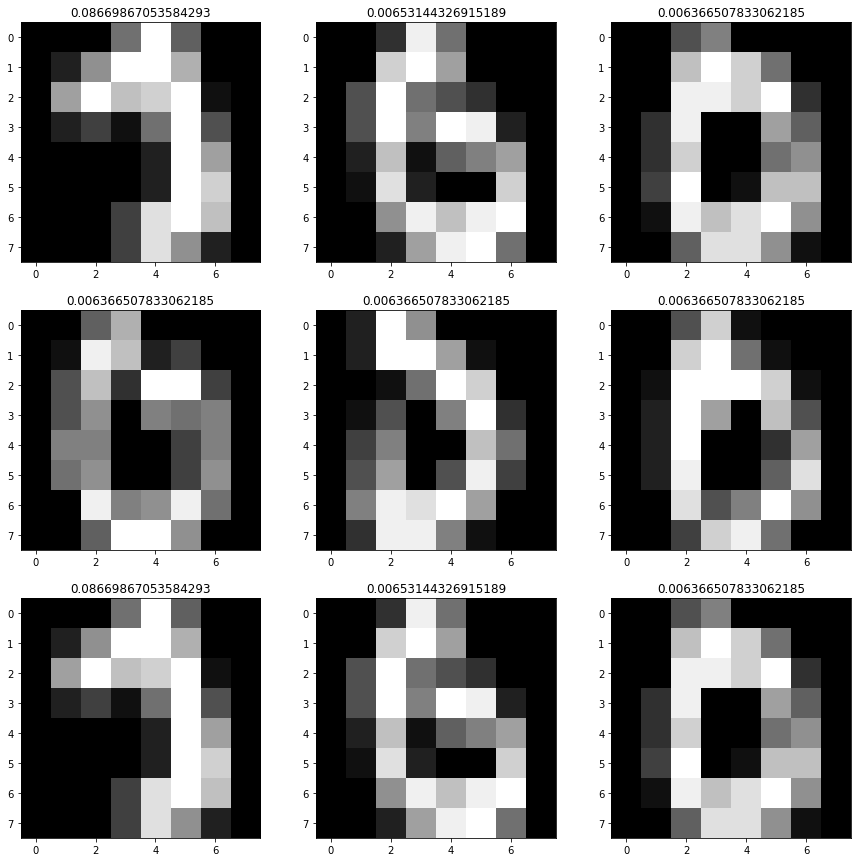

In [217]:
# Test the weights significance
ii_sorted = np.argsort(weights)
ii = weights[ii_sorted]>=0.05*max(weights)
print(np.sum(ii))
print(weights[ii_sorted[ii][-1:]])

c=5
f, ax = plt.subplots(3,3)
f.set_figheight(15)
f.set_figwidth(15)
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(np.reshape(train_data[ii_sorted[ii][c]], [8,8]), cmap='gray')
        ax[i,j].set_title(weights[ii_sorted[ii][c]])
        c-=1

## Test with AdaBoost from sklearn

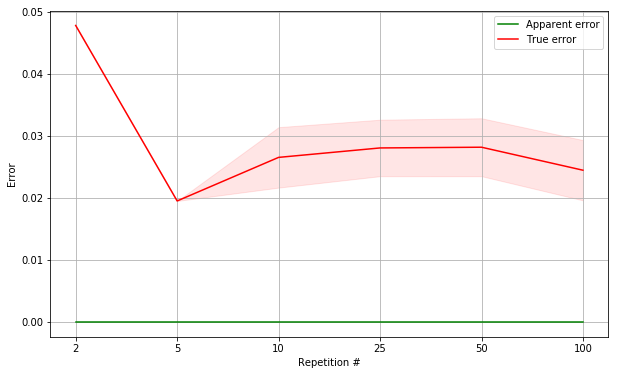

In [168]:
from sklearn.ensemble import AdaBoostClassifier as Adaboost

T = np.array([2, 5, 10, 25, 50, 100])
num_rep = 25

mean_app_error = np.zeros(len(T))
std_app_error = np.zeros(len(T))
mean_true_error = np.zeros_like(mean_app_error)
std_true_error = np.zeros_like(mean_app_error)

for i in range(len(T)):
    app_error = np.zeros(num_rep)
    true_error = np.zeros(num_rep)
    for j in range(num_rep):
        clf = Adaboost(n_estimators = T[i])
        clf.fit(train_data, train_labels)
        pred = clf.predict(train_data)
        app_error[j] = np.sum(np.not_equal(pred, train_labels))/len(train_labels)
        pred = clf.predict(test_data)
        true_error[j] = np.sum(np.not_equal(pred,test_labels))/len(test_labels)
    
    mean_app_error[i] = np.mean(app_error)
    std_app_error[i] = np.std(app_error)
    mean_true_error[i] = np.mean(true_error)
    std_true_error[i] = np.std(true_error)

aa = np.arange(len(T))
plt.figure(figsize=(10,6))
plt.xlabel("Repetition #")
plt.ylabel("Error")
plt.plot(aa, mean_app_error, 'g', label = "Apparent error")
plt.fill_between(aa, mean_app_error - std_app_error,
                    mean_app_error + std_app_error, 
                 alpha=0.1, color="g")
plt.plot(aa, mean_true_error, 'r', label = "True error")
plt.fill_between(aa, mean_true_error - std_true_error,
                    mean_true_error + std_true_error, 
                 alpha=0.1, color="r")
labels = ['2','5', '10', '25', '50','100']
plt.xticks(aa, labels, rotation = 'horizontal')
plt.grid()
plt.legend(loc='best')